In [3]:
pip install numpy opencv-python matplotlib scikit-image


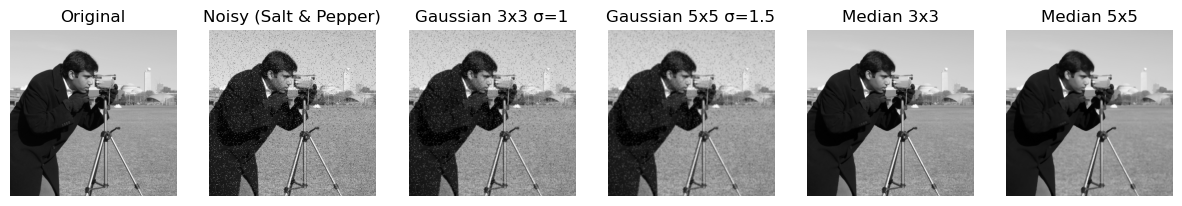

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# --- Helper functions ---

def add_noise(image, noise_type="salt_pepper", amount=0.05):
    noisy = image.copy()
    if noise_type == "salt_pepper":
        num_salt = np.ceil(amount * image.size * 0.5).astype(int)
        num_pepper = np.ceil(amount * image.size * 0.5).astype(int)
        
        # Salt noise
        coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
        noisy[coords[0], coords[1]] = 255
        
        # Pepper noise
        coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
        noisy[coords[0], coords[1]] = 0
    elif noise_type == "gaussian":
        row, col = image.shape
        mean = 0
        sigma = 25
        gauss = np.random.normal(mean, sigma, (row, col)).reshape(row, col)
        noisy = image + gauss
        noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def show_images(images, titles, figsize=(15,10)):
    plt.figure(figsize=figsize)
    n = len(images)
    for i in range(n):
        plt.subplot(1, n, i+1)
        if len(images[i].shape) == 2:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

def gaussian_kernel(kernel_size=3, sigma=1):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

def apply_gaussian_filter(image, kernel_size=3, sigma=1):
    kernel = gaussian_kernel(kernel_size, sigma)
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='edge')
    filtered_img = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            roi = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i,j] = np.sum(roi * kernel)
    return filtered_img.astype(np.uint8)

def apply_median_filter(image, kernel_size=3):
    pad = kernel_size // 2
    padded_img = np.pad(image, pad, mode='edge')
    filtered_img = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            roi = padded_img[i:i+kernel_size, j:j+kernel_size]
            filtered_img[i, j] = np.median(roi)
    return filtered_img.astype(np.uint8)

# --- Main ---

# Load sample grayscale image from skimage
image = data.camera()
image = (image).astype(np.uint8)  # ensure uint8 format

# Add salt and pepper noise
noisy_image = add_noise(image, noise_type='salt_pepper', amount=0.05)

# Apply filters with different parameters
gaussian_3_1 = apply_gaussian_filter(noisy_image, kernel_size=3, sigma=1)
gaussian_5_1_5 = apply_gaussian_filter(noisy_image, kernel_size=5, sigma=1.5)
median_3 = apply_median_filter(noisy_image, kernel_size=3)
median_5 = apply_median_filter(noisy_image, kernel_size=5)

# Show results
show_images(
    [image, noisy_image, gaussian_3_1, gaussian_5_1_5, median_3, median_5],
    ['Original', 'Noisy (Salt & Pepper)', 'Gaussian 3x3 σ=1', 'Gaussian 5x5 σ=1.5', 'Median 3x3', 'Median 5x5']
)
